#### Alex Masciotra
#### 260746829

### Part 2 : Edge Detection

    2.1 Sobel Edge Detection

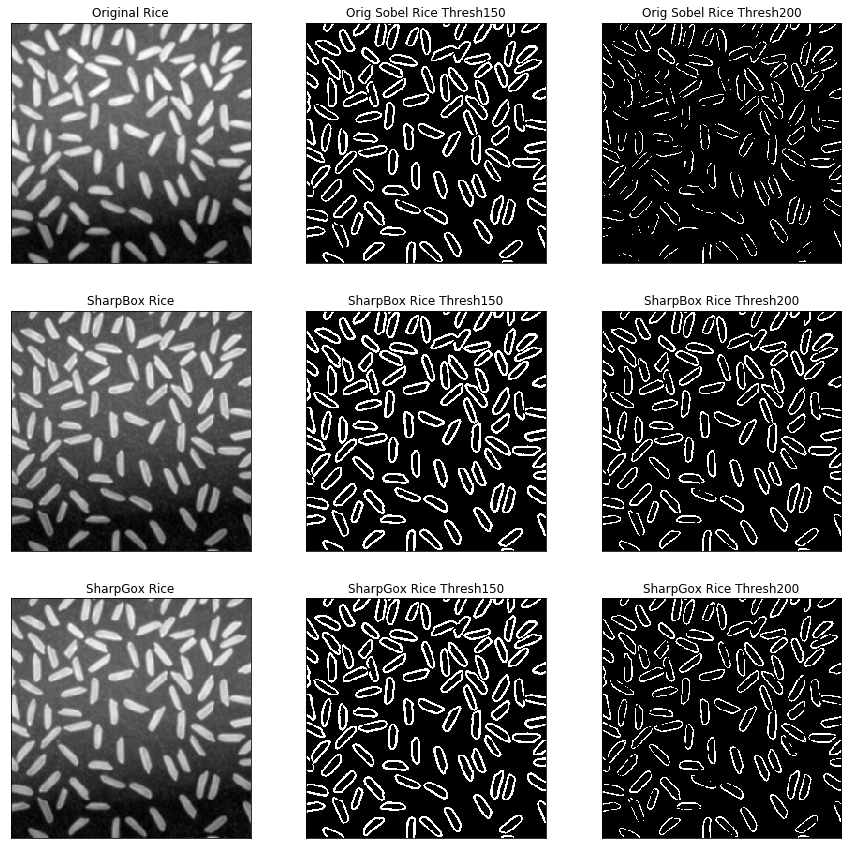

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


#1 Effect of sharpening
#load original Rice
img_ricepath = "./rice.png"
origrice = cv2.imread(img_ricepath,cv2.IMREAD_GRAYSCALE)


# apply 3 by 3 Sobel
origrice_x = cv2.Sobel(origrice, cv2.CV_64F, 1, 0, ksize=3) #gradient of X
origrice_y = cv2.Sobel(origrice, cv2.CV_64F, 0, 1, ksize=3) #grad of y
# magnitude and phase
origrice_m = cv2.magnitude(origrice_x, origrice_y) #magnitude of sx sy
origrice_p = cv2.phase(origrice_x, origrice_y) #phase of sx sy

#apply thresholding
ret150, rice_threshold150 = cv2.threshold(origrice_m, 150, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh
ret200, rice_threshold200 = cv2.threshold(origrice_m, 200, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh


#now will load sharpened rice
#blur image with boxfilter 5 x5
blurBrice = cv2.blur(origrice, (5,5))

#blur image with gaussian variance of 2
blurGrice = cv2.GaussianBlur(origrice, (5,5), 1.41421356237)

detailsB = cv2.subtract(origrice, blurBrice) #box
detailsG = cv2.subtract(origrice, blurGrice) #gaussian

#storing final images
finalSharpenedB = cv2.add(origrice, detailsB)
finalSharpenedG = cv2.add(origrice, detailsG)

#now apply sobel

# apply 3 by 3 Sobel
finalSharpenedB_x = cv2.Sobel(finalSharpenedB, cv2.CV_64F, 1, 0, ksize=3) #gradient of X
finalSharpenedB_y = cv2.Sobel(finalSharpenedB, cv2.CV_64F, 0, 1, ksize=3) #grad of y

finalSharpenedG_x = cv2.Sobel(finalSharpenedG, cv2.CV_64F, 1, 0, ksize=3) #gradient of X
finalSharpenedG_y = cv2.Sobel(finalSharpenedG, cv2.CV_64F, 0, 1, ksize=3) #grad of y

#calculate magnitudes
finalSharpenedB_m = cv2.magnitude(finalSharpenedB_x, finalSharpenedB_y) #magnitude of sx sy
finalSharpenedB_p = cv2.phase(finalSharpenedB_x, finalSharpenedB_y) #phase of sx sy
finalSharpenedG_m = cv2.magnitude(finalSharpenedG_x, finalSharpenedG_y) #magnitude of sx sy
finalSharpenedG_p = cv2.phase(finalSharpenedG_x, finalSharpenedG_y) #phase of sx sy

#apply thresholding to sharpened images

#box filter sharpened
retB150, riceSharpenedB_threshold150 = cv2.threshold(finalSharpenedB_m, 150, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh
retB200, riceSharpenedB_threshold200 = cv2.threshold(finalSharpenedB_m, 200, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh

#Gaus filter sharpened
retG150, riceSharpenedG_threshold150 = cv2.threshold(finalSharpenedG_m, 150, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh
retG200, riceSharpenedG_threshold200 = cv2.threshold(finalSharpenedG_m, 200, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh



# now will graph these results

plt.figure(figsize = (15, 15))
plt.subplot(331), plt.imshow(origrice, cmap="gray")
plt.title("Original Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(rice_threshold150, cmap = "gray")
plt.title("Orig Sobel Rice Thresh150"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(rice_threshold200, cmap = "gray")
plt.title("Orig Sobel Rice Thresh200"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(finalSharpenedB, cmap = "gray")
plt.title("SharpBox Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(riceSharpenedB_threshold150, cmap = "gray")
plt.title("SharpBox Rice Thresh150"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(riceSharpenedB_threshold200, cmap = "gray")
plt.title("SharpBox Rice Thresh200"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(finalSharpenedG, cmap = "gray")
plt.title("SharpGox Rice"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(riceSharpenedG_threshold150, cmap = "gray")
plt.title("SharpGox Rice Thresh150"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(riceSharpenedG_threshold200, cmap = "gray")
plt.title("SharpGox Rice Thresh200"), plt.xticks([]), plt.yticks([])

plt.show()



 The effect of sharpening prior to edge detection.


Sharpening prior to edge detection definitely creates a better result. This is because when sharpening an image, the edges become better defined, so when applying a sobel edge detection it is easier to find the points of biggest change that define edges. Here the threshold of 150 seems to yield the best result as almost every piece of rice is fully continuous and distinguishable. With the 200 threshold, some details of the rice pieces are lost where the contours of the rice was not well defined.

<function matplotlib.pyplot.show(*args, **kw)>

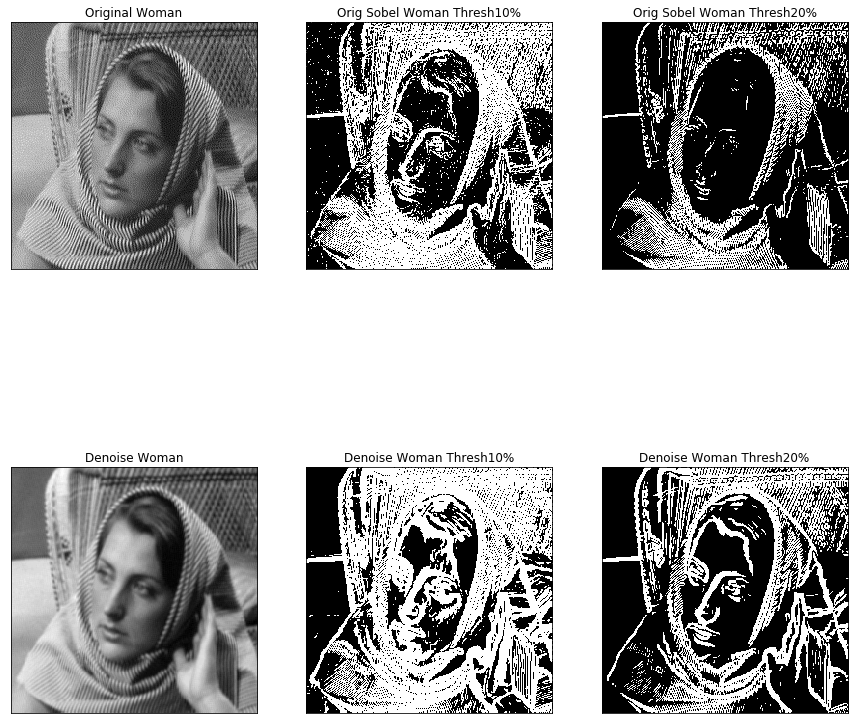

In [28]:
#2 Effects of denoising
img_woman = "./woman.png"
origwoman = cv2.imread(img_woman,cv2.IMREAD_GRAYSCALE)

# apply 3 by 3 Sobel
origwoman_x = cv2.Sobel(origwoman, cv2.CV_64F, 1, 0, ksize=3) #gradient of X
origwoman_y = cv2.Sobel(origwoman, cv2.CV_64F, 0, 1, ksize=3) #grad of y
# magnitude and phase
origwoman_m = cv2.magnitude(origwoman_x, origwoman_y) #magnitude of sx sy
origwoman_p = cv2.phase(origwoman_x, origwoman_y) #phase of sx sy


#need to apply thresholding to woman 10% and 20% of maxvalues
maxvalue = np.max(origwoman_m)

maxthresh_10 = 0.10* maxvalue  #holds 10% value
maxthresh_20 = 0.20* maxvalue  #holds 20% value

#now threshold 

retW10, woman_threshold10 = cv2.threshold(origwoman_m, maxthresh_10, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh
retW20, woman_threshold20 = cv2.threshold(origwoman_m, maxthresh_20, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh




#denoise the woman picture with boxfilter 3x3

blurBwoman = cv2.blur(origwoman, (3,3)) 

#apply sobel

blurBwoman_x = cv2.Sobel(blurBwoman, cv2.CV_64F, 1, 0, ksize=3) #gradient of X
blurBwoman_y = cv2.Sobel(blurBwoman, cv2.CV_64F, 0, 1, ksize=3) #grad of y
# magnitude and phase
blurBwoman_m = cv2.magnitude(blurBwoman_x, blurBwoman_y) #magnitude of sx sy
blurBwoman_p = cv2.phase(blurBwoman_x, blurBwoman_y) #phase of sx sy

#need to apply thresholding to woman 10% and 20% of maxvalues blurred
maxvalue2 = np.max(blurBwoman_m)

maxthresh_10_2 = 0.10* maxvalue2  #holds 10% value
maxthresh_20_2 = 0.20* maxvalue2  #holds 20% value

#now threshold 

retBW10, womanB_threshold10 = cv2.threshold(blurBwoman_m, maxthresh_10_2, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh
retBW20, womanB_threshold20 = cv2.threshold(blurBwoman_m, maxthresh_20_2, 255, cv2.THRESH_BINARY) #Thresh binary sets 0 to pixels under threshold, max higher than thresh


#now graph

# now will graph these results

plt.figure(figsize = (15, 15))
plt.subplot(231), plt.imshow(origwoman, cmap="gray")
plt.title("Original Woman"), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(woman_threshold10, cmap = "gray")
plt.title("Orig Sobel Woman Thresh10%"), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(woman_threshold20, cmap = "gray")
plt.title("Orig Sobel Woman Thresh20%"), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(blurBwoman, cmap = "gray")
plt.title("Denoise Woman"), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(womanB_threshold10, cmap = "gray")
plt.title("Denoise Woman Thresh10%"), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(womanB_threshold20, cmap = "gray")
plt.title("Denoise Woman Thresh20%"), plt.xticks([]), plt.yticks([])
plt.show





the effect of denoising prior to the edge detection. 

As the sobel detection performs a gradient calculation which has partial derivatives in both x and y, these derivatives amplify the amount of noise that is in the image. By denoising the image with a guassian blur, when taking the derivative, the noise is less amplified which yields to better results. Here the best resulting image is the 20% threshold after the gaussian filter is applied. 